# Simple Moving Average

p = price

(p<sub>1</sub> + p<sub>2</sub> + ... + p<sub>n</sub>) / 

<br/>

## Why Use Simple Moving Average?

- We might want to estimate the mean/variance of a stock's returns
- Later, will use SMA for portfolio construction
- Recall volatility clustering (things tend to change over time)
- 2 options:
    - Use all values to calculate the mean/variance
    - Use only the recent (probably more relavant) values
- Recent average might be better for predictive models than overall average

**You can also use it as a means of Algorithmic Trading**
- Plotting 2 different sized SMA plots
- When they cross, take either the long or short position on the stock depending on which sized SMA line crossed over the other.

### SMA - Pseudocode

```py
# Return a rolling object
rolling_window = df['GOOG'].rolling(window_size)

# Return a series/dataframe of rolling means (or min, max, sum, etc...)
rolling_window.mean()

# Multi-dimensional rolling window
covariance = df[['GOOG', 'AAPL']].rolling(50).cov()
```


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
close = pd.read_csv('../sp500_close.csv', index_col=0, parse_dates=True)

In [3]:
goog = close[['GOOG']].copy().dropna()

In [4]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


<AxesSubplot:>

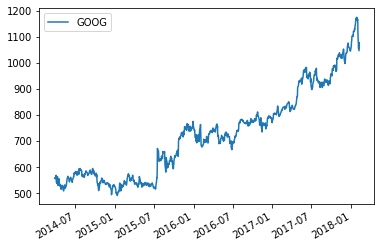

In [5]:
goog.plot()

In [6]:
# Log returns for GOOG

goog_ret = np.log(goog.pct_change(1) + 1)

<AxesSubplot:>

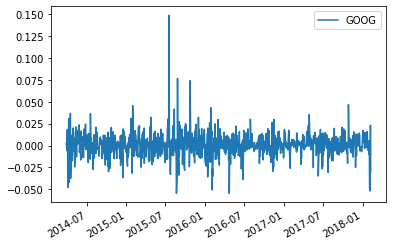

In [7]:
# Plot log returns as time series

goog_ret.plot()

In [9]:
# Using a Simple Moving average - on a new column in the goog df

goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


<AxesSubplot:>

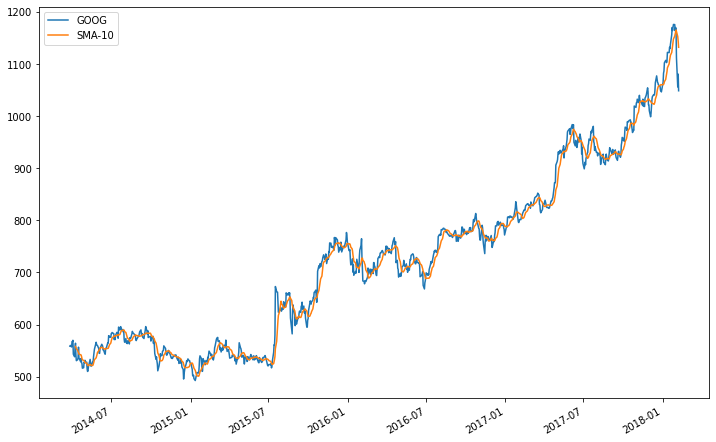

In [13]:
goog.plot(figsize=(12,8))

In [14]:
# Checking the type of the rolling window

type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

In [15]:
# Calculating a second moving average with a window size of 50

goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.head()

,GOOG,SMA-10,SMA-50
2014-03-27,558.46,NaN,NaN
2014-03-28,559.99,NaN,NaN
2014-03-31,556.97,NaN,NaN
2014-04-01,567.16,NaN,NaN
2014-04-02,567.00,NaN,NaN


<AxesSubplot:>

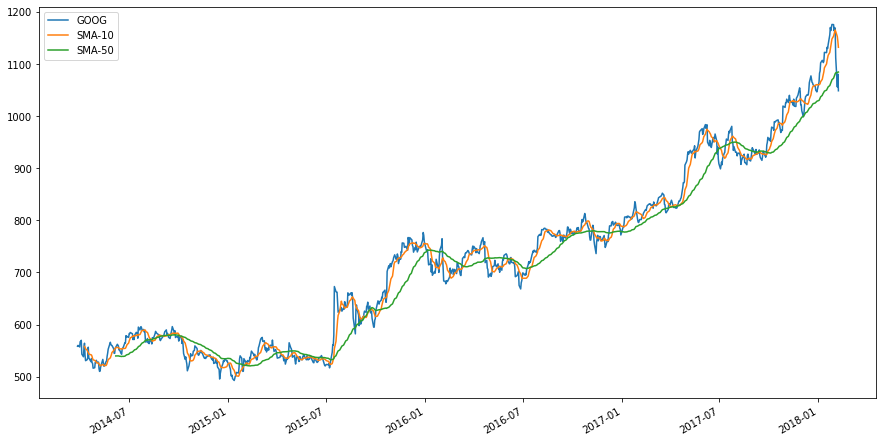

In [16]:
# Plotting the price of GOOG, and the SMA 10/50 lines
goog.plot(figsize=(15,8))

In [17]:
# Working with a mulit-dimensional time series (GOOG and AAPL) using covariance between the two stocks

goog_aapl = close[['GOOG', 'AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [19]:
# Selecting a single row by date to get the covariance matrix

cov.loc['2018-02-06'].to_numpy()

array([[2691.75646465,   38.17446816],
       [  38.17446816,   19.12137143]])

In [20]:
# Calculating the log returns for AAPL and GOOG (in a new DF)

goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [21]:
# Calculating a 50d SMA for AAPL and GOOG log returns (not prices!)

goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

<AxesSubplot:>

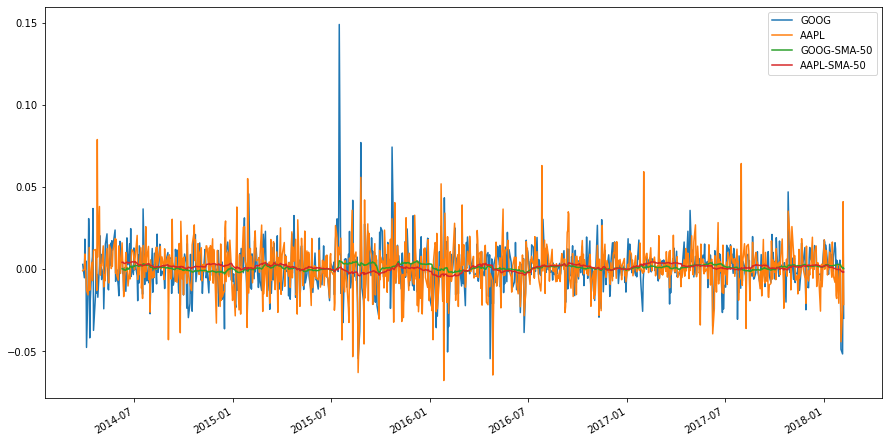

In [22]:
goog_aapl_ret.plot(figsize=(15,8))

In [24]:
# Calculating a 50d rolling covariance of the returns

cov = goog_aapl_ret[['GOOG-SMA-50', 'AAPL-SMA-50']].rolling(50).cov()
cov.tail(6)

GOOG-SMA-50   AAPL-SMA-50
2018-02-05 GOOG-SMA-50  2.614053e-07 -7.715772e-08
           AAPL-SMA-50 -7.715772e-08  1.188405e-06
2018-02-06 GOOG-SMA-50  2.852362e-07 -1.882949e-08
           AAPL-SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG-SMA-50  3.430702e-07  8.238184e-08
           AAPL-SMA-50  8.238184e-08  1.506869e-06

In [25]:
# Calculate the rolling CORRELATION of the two log returns - notice most of the correlation is negative, however (see the last entry) this can be changed.

corr = goog_aapl_ret[['GOOG-SMA-50', 'AAPL-SMA-50']].rolling(50).corr()
corr.tail(16)

GOOG-SMA-50  AAPL-SMA-50
2018-01-29 GOOG-SMA-50     1.000000    -0.353417
           AAPL-SMA-50    -0.353417     1.000000
2018-01-30 GOOG-SMA-50     1.000000    -0.397767
           AAPL-SMA-50    -0.397767     1.000000
2018-01-31 GOOG-SMA-50     1.000000    -0.426551
           AAPL-SMA-50    -0.426551     1.000000
2018-02-01 GOOG-SMA-50     1.000000    -0.462629
           AAPL-SMA-50    -0.462629     1.000000
2018-02-02 GOOG-SMA-50     1.000000    -0.406629
           AAPL-SMA-50    -0.406629     1.000000
2018-02-05 GOOG-SMA-50     1.000000    -0.138433
           AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000